In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
df=pd.read_excel('C:/dataset/Telco_customer_churn.xlsx')

In [6]:
df.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [7]:
df.shape

(7043, 30)

In [8]:
df.columns

Index(['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [9]:
df.dtypes

Customer ID                           object
Count                                  int64
Quarter                               object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless 

In [12]:
df['Avg Monthly GB Download']

0

<Axes: >

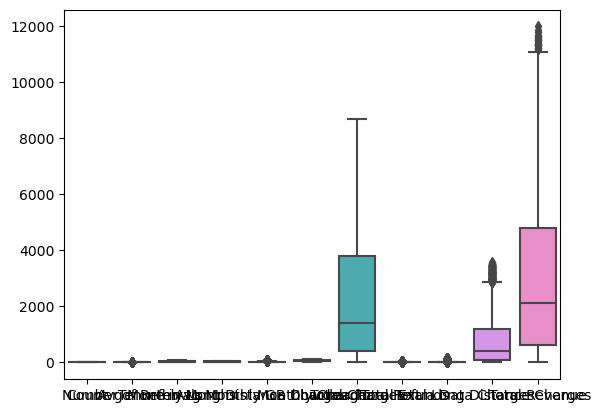

In [14]:
sns.boxplot(df)

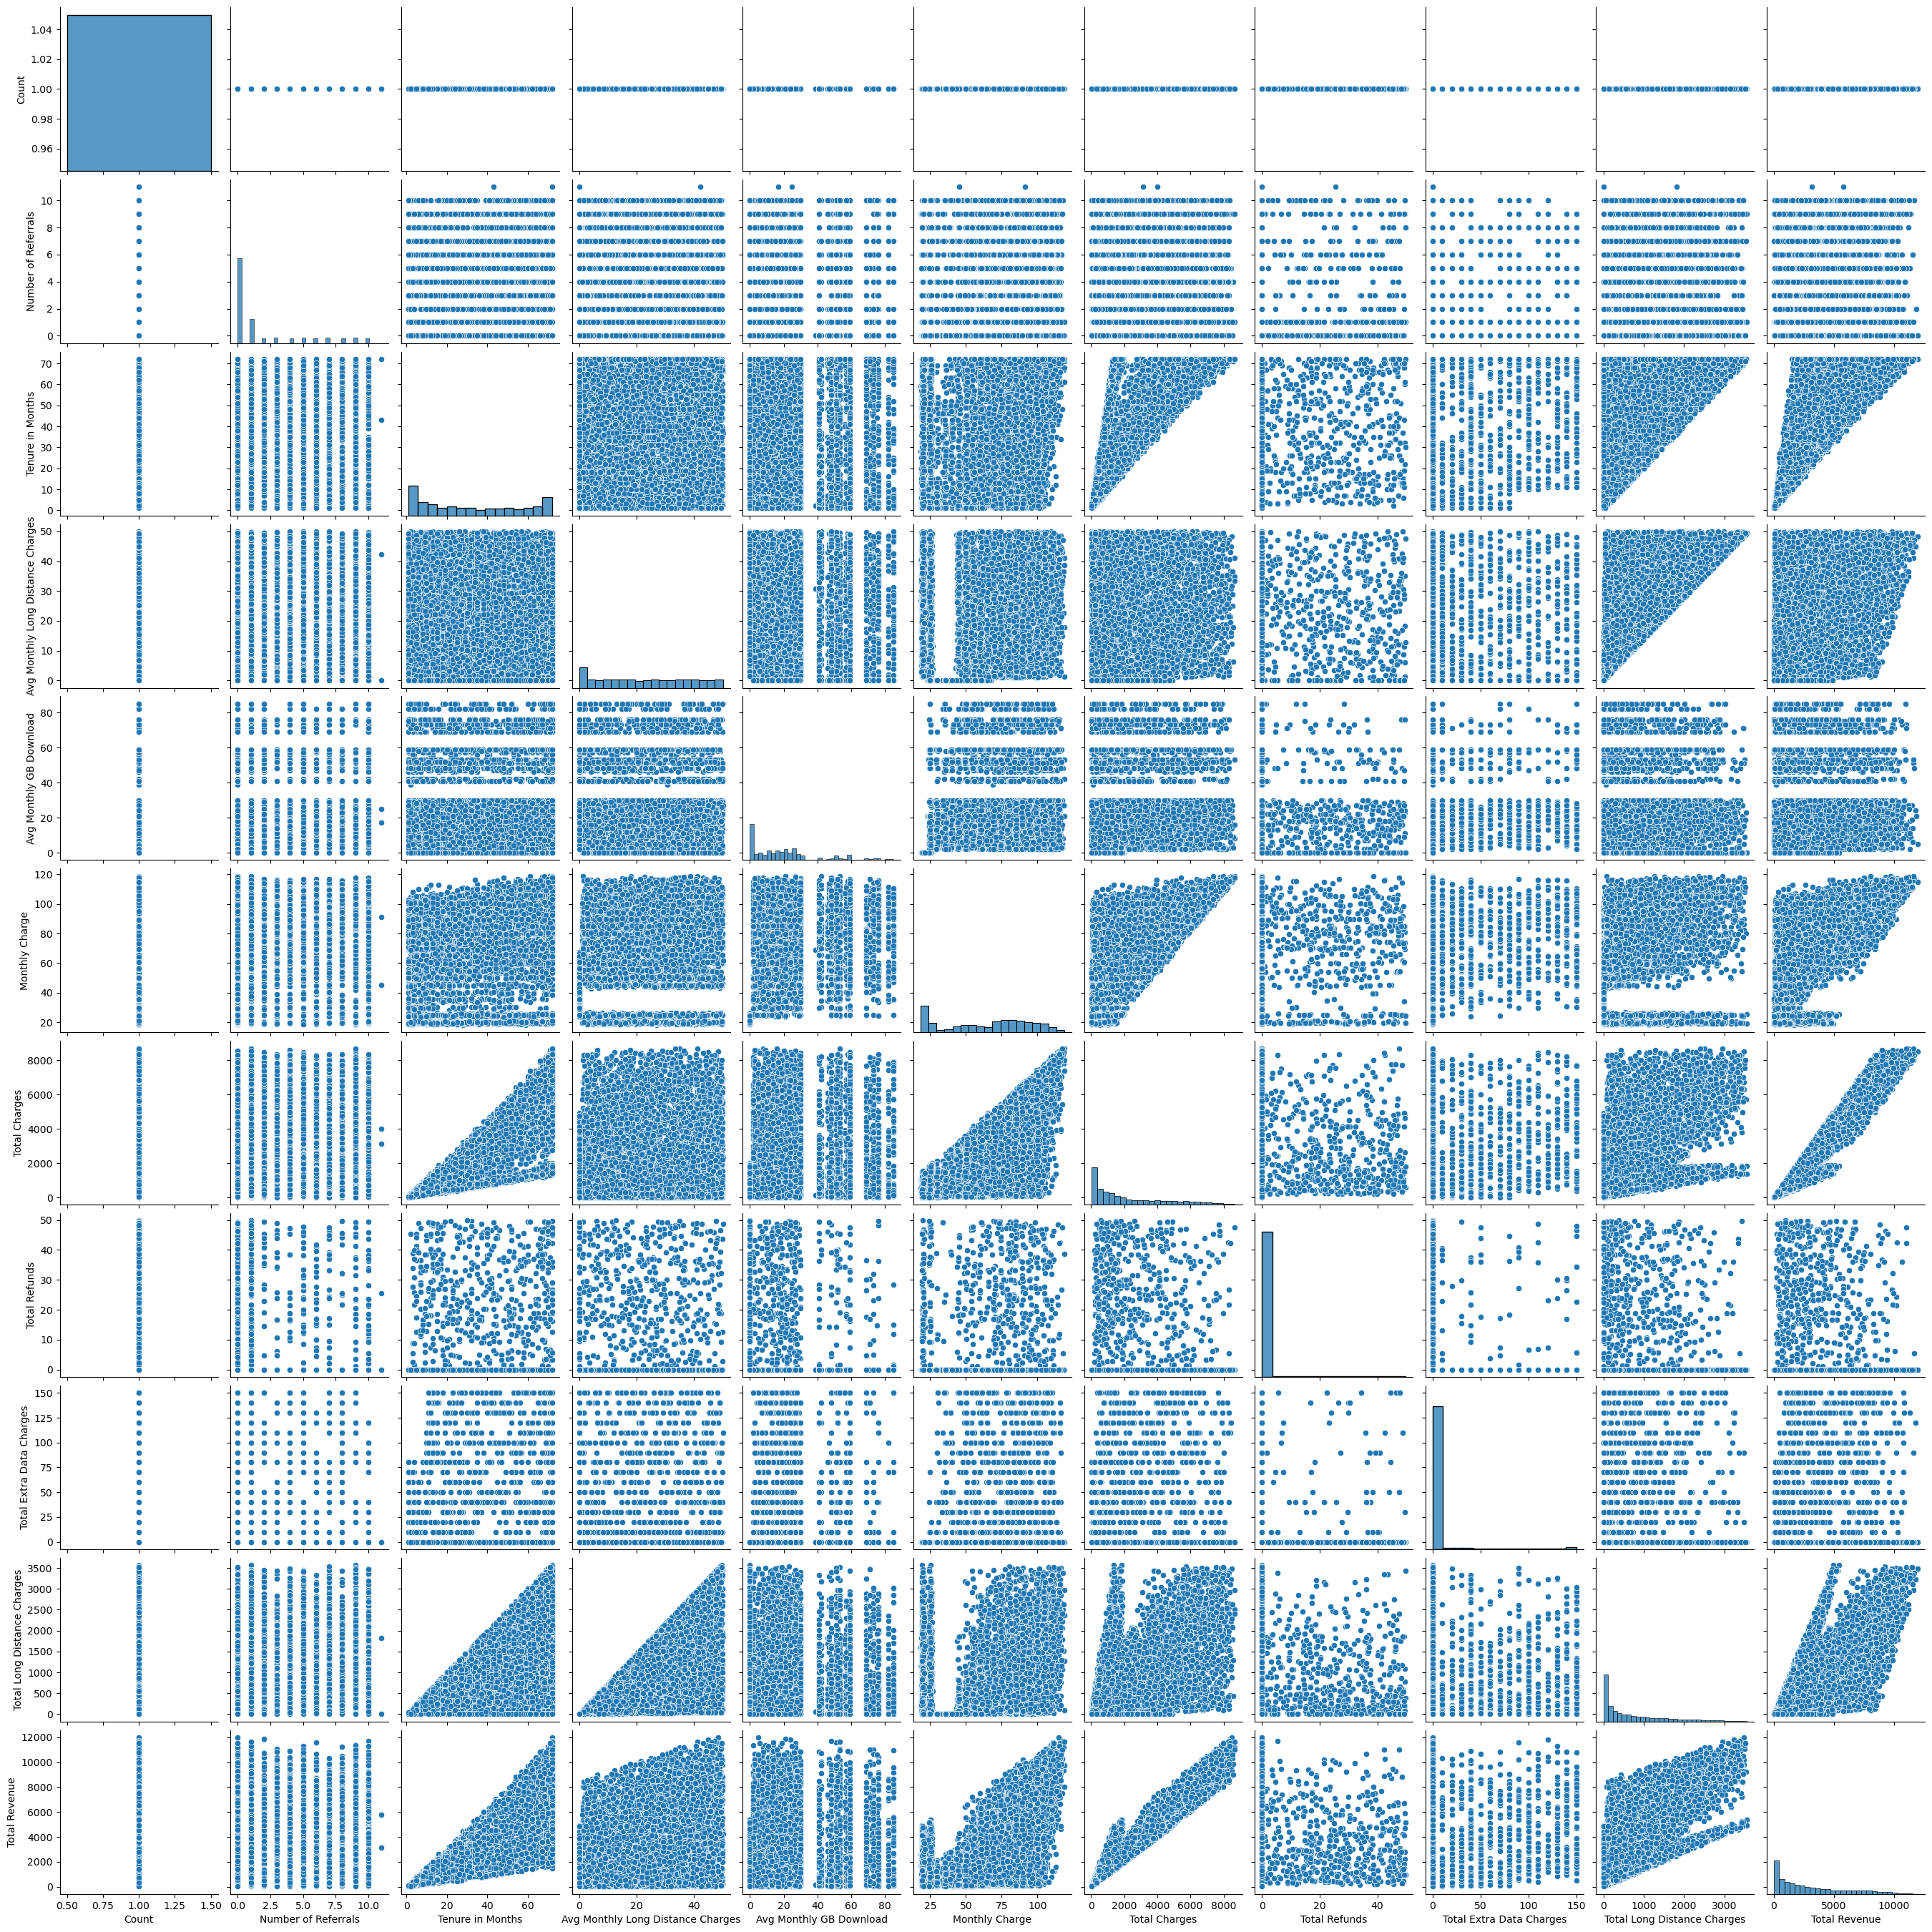

In [15]:
sns.pairplot(df)

### One hot encoding

In [18]:

from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()

In [19]:
df.dtypes

Customer ID                           object
Count                                  int64
Quarter                               object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless 

In [20]:

df=df[['Customer ID', 'Quarter', 'Referred a Friend',
        'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Long Distance Charges',
       'Total Revenue']]


In [21]:

enc_df=pd.DataFrame(enc.fit_transform(df.iloc[:,2:]).toarray())


In [22]:

def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [24]:
df_norm =norm_func(enc_df.iloc[:,1:])

In [25]:

TWSS=[]
k=list(range(2,8))
for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

C:\Users\nisha\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nisha\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nisha\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nisha\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nisha\anaconda5\Lib\site-packages\sklearn\clust

Text(0, 0.5, 'total within SS')

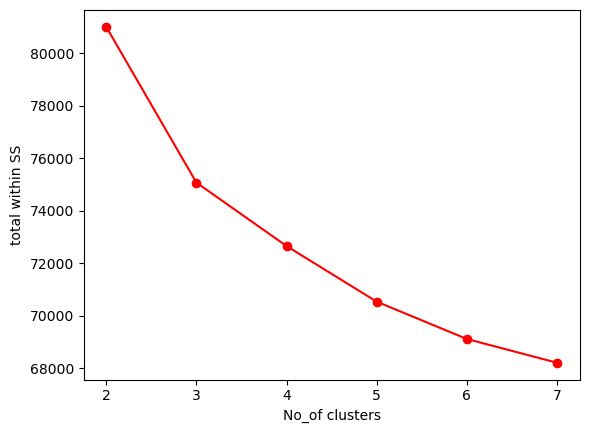

In [26]:
TWSS
#as k value increses the TWSS value decreases
plt.plot(k,TWSS,'ro-');
plt.xlabel('No_of clusters');
plt.ylabel("total within SS")

In [27]:
model=KMeans(n_clusters=3)
model.fit(df_norm)

C:\Users\nisha\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [28]:
model.labels_
clusters_no=pd.Series(model.labels_)
df['clust']=clusters_no
df.head()

C:\Users\nisha\AppData\Local\Temp\ipykernel_5056\3072833800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clust']=clusters_no


,Customer ID,Quarter,Referred a Friend,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Online Security,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Long Distance Charges,Total Revenue,clust
0,8779-QRDMV,Q3,No,None,No,0.00,No,Yes,DSL,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,0.00,59.65,1
1,7495-OOKFY,Q3,Yes,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,No,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,390.80,1024.10,1
2,1658-BYGOY,Q3,No,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,203.94,1910.88,0
3,4598-XLKNJ,Q3,Yes,Offer C,Yes,19.76,No,Yes,Fiber Optic,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,494.00,2995.07,0
4,4846-WHAFZ,Q3,Yes,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,234.21,3102.36,1


In [29]:
model=KMeans(n_clusters=4)
model.fit(df_norm)

C:\Users\nisha\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [30]:
model.labels_
clusters_no=pd.Series(model.labels_)
df['clust']=clusters_no
df.head()

C:\Users\nisha\AppData\Local\Temp\ipykernel_5056\3072833800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clust']=clusters_no


,Customer ID,Quarter,Referred a Friend,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Online Security,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Long Distance Charges,Total Revenue,clust
0,8779-QRDMV,Q3,No,None,No,0.00,No,Yes,DSL,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,0.00,59.65,3
1,7495-OOKFY,Q3,Yes,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,No,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,390.80,1024.10,0
2,1658-BYGOY,Q3,No,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,203.94,1910.88,1
3,4598-XLKNJ,Q3,Yes,Offer C,Yes,19.76,No,Yes,Fiber Optic,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,494.00,2995.07,1
4,4846-WHAFZ,Q3,Yes,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,234.21,3102.36,0
